In [3]:
"""
This script unpacks the 4-dimensional data from the ROOT file to a pickled pandas dataframe
"""

import pandas as pd
import uproot
import numpy as np
from sklearn.model_selection import train_test_split

# ROOTFilePath = './../data/all_jets_train_4D_100_percent.pkl'

processed_folder = './../processed_data/'

# auto_filename = True
# #Unused if auto_filename = True
# train_filename = 'all_jets_train.pkl'
# test_filename = 'all_jets_test.pkl'

# #Fraction of data to be saved
# data_frac = 0.2

# tree = uproot.open(ROOTFilePath)['CollectionTree']

# #Specifies the dataset. The available 'columns' can be read with ttree.keys()
# branchnames = ['HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.m',
#                'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.pt',
#                'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.phi',
#                'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.eta']

# df_dict = {}
# for pp, branchname in enumerate(branchnames):
#     print("Reading: " + branchname)
#     if 'EnergyPerSampling' in branchname:
#         pass
#     else:
#         variable = branchname.split('.')[1]
#         df_dict[variable] = []
#         jaggedX = tree.array(branchname)
#         for ii, arr in enumerate(jaggedX):
#             for kk, val in enumerate(arr):
#                 df_dict[variable].append(val)

# print('100%')
# print('Creating DataFrame...')
# df = pd.DataFrame(data=df_dict)
# print('Head of data:')
# print(df.head())

# train, test = train_test_split(df, test_size=0.2, random_state=41)

# if auto_filename:
#     train_filename = "all_jets_train_4D_" + str(int(data_frac*100))+"_percent.pkl"
#     test_filename = "all_jets_test_4D_" + str(int(data_frac*100)) +"_percent.pkl"  
    
train = pd.read_pickle('./../data/all_jets_train_4D_100_percent.pkl')
test = pd.read_pickle('./../data/all_jets_test_4D_100_percent.pkl')
# partial_train_percent = train.sample(frac=data_frac, random_state=42).reset_index(drop=True)  # Pick out a fraction of the data
# partial_test_percent = test.sample(frac=data_frac, random_state=42).reset_index(drop=True)

print("Train data shape: " + str(train.shape))
print("Test data shape: " + str(test.shape))
      
# # Save train and test sets
# print('Saving ' + processed_folder + train_filename)
# train.to_pickle(processed_folder + train_filename)
# print("Saving " + processed_folder + test_filename)
# test.to_pickle(processed_folder + test_filename)

Train data shape: (111778, 4)
Test data shape: (27945, 4)


[[ 4.98372998e+03  2.37980703e+04  1.96215689e+00 -5.95315620e-02]
 [ 5.43527344e+03  2.18818672e+04  1.03541183e+00  7.34343290e-01]
 [ 5.23940869e+03  2.46081348e+04 -1.12105548e+00  8.28848124e-01]
 ...
 [ 4.84719189e+03  2.52099941e+04 -2.18137169e+00 -2.28139424e+00]
 [ 7.62975732e+03  3.70387461e+04 -2.67075825e+00 -8.30225229e-01]
 [ 9.27232227e+03  5.27853164e+04 -2.02498031e+00  5.90419412e-01]]


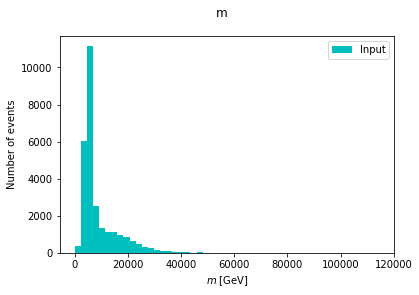

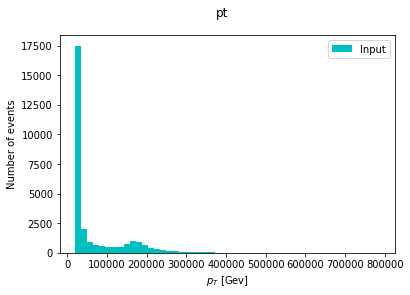

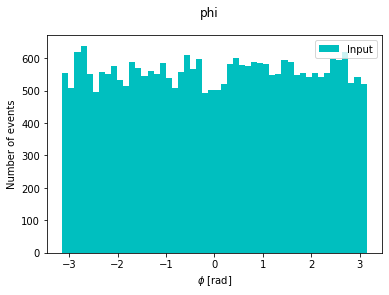

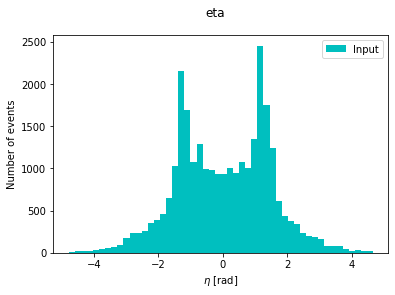

In [5]:
import matplotlib.pyplot as plt
import torch

curr_save_folder = '../data/'
plt.close('all')
unit_list = ['[GeV]', '[Gev]', '[rad]', '[rad]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = test[idxs[0]:idxs[1]].values

print(data)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    plt.suptitle(test.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    # plt.yscale('log')
    plt.legend()
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    plt.savefig(curr_save_folder + fig_name)